# 2η εργασία Αναγνώριση Προτύπων - Βασισμένο στο 4ο PDF "Εκτίμηση Παραμέτρων"
## Σταύρος Βασίλειος Μπουλιόπουλος 9671
Εισαγωγή βιβλιοθηκών

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Μέρος A
Κλάση $ω_1$ : χωρίς άγχος-No Stress. Κλάση $ω_2$ : με άγχος- With Stress.

Αρχικοποίηση δεδομένων χρησιμοποίωντας τους πίνακες δεικτών $D1$, $D2$ και τις a priori πιθανότητες των δύο κλάσεων.

In [31]:
#eisagwgh dedomenwn
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
len1 = D1.size
len2 = D2.size
#a priori pi8anothtes gia ka8e klash
P_w1 = len1/(len1+len2)
P_w2 = len2/(len1+len2)

## Classifier
Χρησιμοποιείται για τους υπολογισμούς της μεθοδολογίας εκτίμησης μέγιστης πιθανοφάνειας

In [38]:
thetas = np.linspace(-10, 10, 100)
#ektimhtes megisths pi8anofaneias basei ka8e klashs
theta1 = theta2 = 0
class ClassifierA:
        def __init__(self):
                pass
        
        #logari8mismenos o typos ths ekfwnhshs
        def lnP_x_theta(self, x, theta):
                return np.log((1 / np.pi) * (1 / (1 + (x - theta) ** 2)))
        
        #L(theta) opou to ginomeno to ln-izw gia na bgei a8roisma
        def L_theta(self, D):
                lnP_x_theta = np.frompyfunc(self.lnP_x_theta, 2, 1)
                return np.fromiter((np.sum(lnP_x_theta(D, theta)) for theta in thetas), float)
        #paragwgish~euresh megistou
        def fit(self, D):
                return thetas[np.argmax(self.L_theta(D))] 
        #A2 ypologismoi synarthsh diakrishs
        def g_x(self, x):
                return self.lnP_x_theta(x, theta1) - self.lnP_x_theta(x, theta2) + np.log(P_w1) - np.log(P_w2)

        def predict(self, D):
                return np.fromiter((self.g_x(x) for x in D), float)

$\textbf{A.1}$ Παρουσίαση αποτελεσμάτων των $logP(\textbf{D}_1|\theta)$ και $logP(\textbf{D}_2|\theta)$ συναρτήσει του $\theta$.

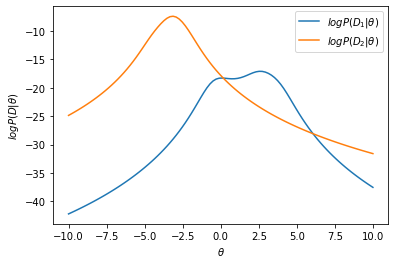

In [39]:
classifier = ClassifierA()

theta1 = classifier.fit(D1)
theta2 = classifier.fit(D2)
plt.plot(thetas, classifier.L_theta(D1), label = '$logP(D_1|θ)$')
plt.plot(thetas, classifier.L_theta(D2), label = '$logP(D_2|θ)$')

plt.xlabel("$θ$")
plt.ylabel("$logP(D|θ)$")
plt.legend()
plt.show()

$\textbf{A.2}$ Παρουσίαση αποτελεσμάτων της συνάρτησης διάκρισης $g(x) = log(P|̂\hat{θ_1}) - log(P|̂\hat{θ_2}) + logP(ω_1) - logP(ω_2)$ για την ταξινόμηση των δεδομένων μας. 

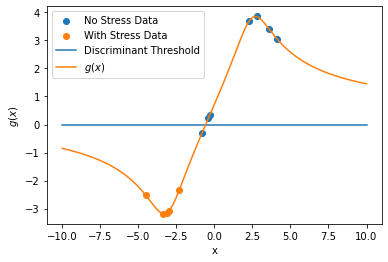

In [40]:
x = np.linspace(-10, 10, 100)

plt.scatter(D1, classifier.predict(D1))
plt.scatter(D2, classifier.predict(D2))
plt.plot(x, np.zeros(x.shape))
plt.plot(x, classifier.predict(x))
plt.xlabel('x')
plt.ylabel('$g(x)$')
plt.legend(['No Stress Data', 'With Stress Data', 'Discriminant Threshold', '$g(x)$'])
plt.show()

# Μέρος B
## Classifier
Χρησιμοποιείται για τους υπολογισμούς της μεθοδολογίας εκτίμησης παραμέτρων κατά Bayes

In [41]:
#step ypsous gia oloklhrwsh me kanona trapeziou
dh = (thetas[-1] - thetas[0]) / len(thetas)

class ClassifierB:

        def __init__(self):
                pass
        
        #synarthsh apo ekfwnhsh meros A
        def P_x_theta(self, x, theta):
                return (1 / np.pi) * (1 / (1 + (x - theta) ** 2))
        
        #synarthsh apo ekfwnhsh meros B
        def P_theta(self):
                return (1 / (10 * np.pi)) * (1 / (1 + (thetas / 10) ** 2))
        
        #ypologismos opws prin alla xwris logari8mish
        def P_D_theta(self, D):
                P_x_theta = np.frompyfunc(self.P_x_theta, 2, 1)
                return np.fromiter((np.prod(P_x_theta(D, theta)) for theta in thetas), float)
        
        #oloklhrwsh basei kanona trapeziou
        def integralTrapezoidal(self, f):
                return (dh / 2) * (f[0] + 2 * np.sum(f[1:-1]) + f[-1])
        
        #formula Bayes apo PDF
        def P_theta_D(self, D):
                f = np.multiply(self.P_D_theta(D), self.P_theta())
                return f / self.integralTrapezoidal(f)
        #formula Marginalization apo PDF
        def P_x_D(self, x, D):
                f = np.multiply(self.P_x_theta(x, thetas), self.P_theta_D(D))
                return self.integralTrapezoidal(f)       
        
        #B2 ypologismoi
        def h_x(self, x):
                return np.log(self.P_x_D(x, D1)) - np.log(self.P_x_D(x, D2)) + np.log(P_w1) - np.log(P_w2)
        def predict(self, D):
                return np.fromiter((self.h_x(x) for x in D), float)

$\textbf{Β.1}$ Παρουσίαση αποτελεσμάτων των $P(θ|D_1)$, $P(θ|D_2)$ και $P(θ)$ συναρτήσει του $\theta$.

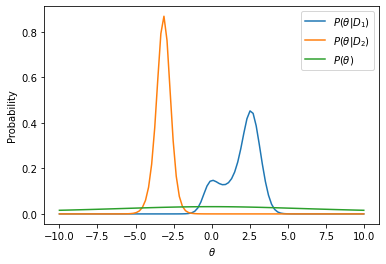

In [42]:
classifier = ClassifierB()
plt.plot(thetas, classifier.P_theta_D(D1))
plt.plot(thetas, classifier.P_theta_D(D2))
plt.plot(thetas, classifier.P_theta())
plt.xlabel('$θ$')
plt.ylabel('Probability')
plt.legend(['$P(θ|D_1)$', '$P(θ|D_2)$', '$P(θ)$'])
plt.show()

$\textbf{B.2}$ Παρουσίαση αποτελεσμάτων της συνάρτησης διάκρισης $h(x) = logP(x|D_1) - logP(x|D_2) + logP(ω_1) - logP(ω_2)$ για την ταξινόμηση των δεδομένων μας. 


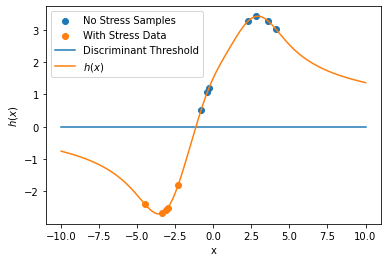

In [43]:
x = np.linspace(-10 , 10, 1000)

plt.scatter(D1, classifier.predict(D1))
plt.scatter(D2, classifier.predict(D2))
plt.plot(x, np.zeros(x.shape))
plt.plot(x, classifier.predict(x))
plt.xlabel('x')
plt.ylabel('$h(x)$')
plt.legend(['No Stress Samples', 'With Stress Data', 'Discriminant Threshold', '$h(x)$'])
plt.show()

## Σύγκριση των 2 μεθόδων βάσει των αποτελεσμάτων και από τα 2 μέρη
Παρατηρούμε ότι η δεύτερη μέθοδος είναι πιο πετυχημένη, καθώς ταξινομεί όλα τα δείγματα στην κάθε κλάση του, ενώ η πρώτη μέθοδος αδυνατεί να ταξινομήσει 1 δείγμα στην πραγματική κλάση του με τον μη αγχωμένο χρήστη. Αυτό συμβαίνει, γιατί 
- στην **εκτίμηση με μέγιστη πιθανοφάνεια** μόλις κλειδώσουμε στην εκτίμηση των παραμέτρων με την παραγώγιση της πιθανοφάνειας τότε λαμβάνουμε υπόψιν την πιθανότητα $P(θ|D_i)$ ως κάτι μη μεταβλητό

- στην **εκτίμηση κατά Bayes** υπολογίζουμε την $P(θ|D_i)$ ως συνάρτηση πυκνότητας πιθανότητας λαμβάνοντας υπόψιν την $θ$ ως τυχαία μεταβλητή και συμπεραίνουμε ότι από τον υπολογισμό της a posteriori **κατανομής** του $θ$ βλέποντας την διασπορά **αυτής** πετυχαίνουμε καλύτερη εμπιστοσυνή στον ταξινομητή